---
title: Sampling Bayes Theorem
layout: collection
permalink: /Computational-Biology/Sampling-Bayes-Theorem
collection: Computational-Biology
mathjax: true
toc: true
categories:
  - study
tags:
  - mathematics
  - statistics
---

In [1]:
import numpy as np
from scipy.special import gammaln
from matplotlib import pyplot as plt
import seaborn as sns
import scipy as sp
sns.set_theme()

 Imagine we have a boxwith a total of $T$ balls in it, where among these, we have a total of $r$ red balls. If we now take out $n$ balls, how many of these are red?
We can imagine this as that each ball has a number from 1 to $T$ and we take out a ball one by one. Then for the first ball, we have a total of $T$ possible balls from which we can pick, the second time we only have $T - 1$ balls left etc. With this we get:

$$
T \cdot (T - 1) \cdot (T - 2) \cdot ... \cdot 2 \cdot 1 = T!
$$

Which is the total amount of arrangements of our numbered $T$ balls. Then taking only $n$ balls from $T$ gives us:

$$
T \cdot (T - 1) \cdot (T - 2) \cdot ... \cdot (T - n) = \frac{T!}{(T - n)!}
$$

From our first $n$ picked balls, these have $n!$ combinations we do not care about, so we divide by these amount of combinations to get out total amount of possibilities
of taking $n$ balls out of $T$:

$$
N = \frac{T!}{n!(T - n)!} = \begin{pmatrix} T \\ n \end{pmatrix}
$$ 

Because we then have no means of differentiating between these differnt possibilities, we get the uniform probability $\mathbb{P}(A_i \| I) = \frac{1}{N}$ for all these possibilities. If we now want to find out the probability of having $k$ red balls in our $n$ balls, we'd have to sum over all possibilities in $N$ where we have $k$ red balls:

$$
\mathbb{P}(k | I) = \frac{N(k)}{N}
$$

Looking at our $n$ picked balls, the amount of possibilities of having $n - k$ blue balls is given by $\begin{pmatrix} T - r \\ n - k \end{pmatrix}$ 
and the possibilities of having k red balls are $\begin{pmatrix} r \\ k \end{pmatrix}$
Thus in total we get

$$
N(k) = \begin{pmatrix} T - r \\ n - k \end{pmatrix} \begin{pmatrix} r \\ k \end{pmatrix}
$$

The probability of then having k red balls out of our sample of size $n$ from the total amount of balls $T$ is given by the so called hypergeomtric distribution: 

$$
\mathbb{P}(k | I) = \frac{\begin{pmatrix} T - r \\ n - k \end{pmatrix} \begin{pmatrix} r \\ k \end{pmatrix}}{\begin{pmatrix} T \\ n \end{pmatrix}}
$$

For large $T$ and smallr $n$ and $k$ we can approximate the factorial by a power multiplication, $(T - n)! \approx T^n$. By using this approximation we can transform our hypergeometric distribution into the so called Binomial distribution:

$$
\mathbb{P}(k | I) = \begin{pmatrix} n \\ k \end{pmatrix} \left( \frac{r}{T} \right)^k \left(1 - \frac{r}{T} \right)^{n - k}
$$

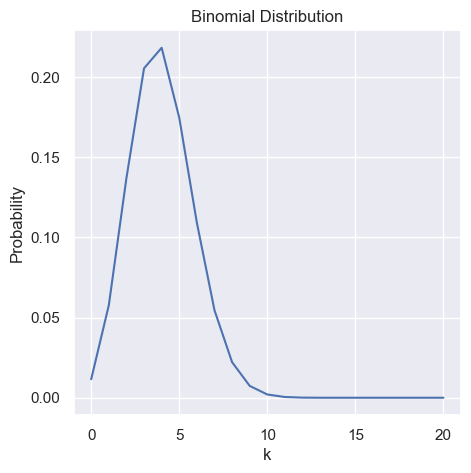

In [2]:
p = 0.2
n = 20
k = np.arange(0, n + 1, 1)

binomial = sp.stats.binom(n, p)
prob = binomial.pmf(k)

plt.figure(figsize=(5, 5))
plt.plot(k, prob)
plt.xlabel('k')
plt.ylabel('Probability')
plt.title('Binomial Distribution')
plt.show()

### Mean, average, expected value

Given a distribution $\mathbb{P}(k \| I)$ the mean, average or expected value of this distribution is given as:

$$
\langle k \rangle = \sum_k k \mathbb{P}(k |n, p)
$$

For a fixed set, the mean is given as $\bar{k} = \frac{1}{n} \sum_{i = 1}^n k_i$

The mean of the binomial distribution is given as $\langle k \rangle = np$

<details>
<summary> Proof </summary>
\begin{align*}
\langle k \rangle 
&= \sum_k k \begin{pmatrix} n \\ k \end{pmatrix} p^k (1 - p)^{n - k} \\
&= \sum_k \begin{pmatrix} n \\ k \end{pmatrix} k \cdot p \cdot p^{k - 1} (1 - p)^{n - k} \\
&= \sum_k \begin{pmatrix} n \\ k \end{pmatrix} p \cdot \frac{d}{dq} q^k (1 - p)^{n - k} \Bigr|_{q = p} \\
&= p \frac{d}{dq} \sum_k \begin{pmatrix} n \\ k \end{pmatrix} q^k (1 - p)^{n - k} \Bigr|_{q = p} \\
&= p \frac{d}{dq} (1 - p + q)^n \Bigr|_{q = p} \\
&= np \quad q.e.d
\end{align*}
</details>

### Mode of the binomial distribution

The mode of a distribution is the most likely value, the value that most often appears in a given dataset of the distribution.

Let $k_*$ be the value of $k$ with the highest probability, the mode is given by 

$$
(n + 1)p - 1 < k_* < (n + 1)p
$$

and for large $n$ this converges to the expected value $np$.

<details>
<summary> Proof </summary>

We want to check when $k_*$ has the highest probability and simplify:

$$
\begin{align*}
\begin{pmatrix} n \\ k_* \end{pmatrix} p^{k_*} (1 - p)^{n - k_*} &> \begin{pmatrix} n \\ k_*  + 1\end{pmatrix} p^{k_* + 1} (1 - p)^{n - k_* - 1} \\
\frac{n!}{k_*!(n - k_*)!} p^{k_*} (1 - p)^{n - k_*} &> \frac{n!}{(k_* + 1)!(n - k_* - 1)!} p^{k_* + 1} (1 - p)^{n - k_* - 1} \\
\frac{1}{(n - k_*)}  &> \frac{1}{(k_* + 1)} p (1 - p)^{-1} \\
(k_* + 1)(1- p) &> (n - k_*)p \\
k_* - k_* p + 1 - p &> np - k_* p \\
k_* + 1 - p &> np \\
k_* &> np + p - 1 \\
k_* &> p(n + 1) - 1 \quad q.e.d
\end{align*}
$$

Other boundary is can be derived the same way.
</details>

### Cumulative distribution

We may, instead of wanting the probability of a specific $k$, the probability of a value being less or equal $k$: $\mathbb{P}(x \leq k |n, p)$. This is the so called cumulative function and can be written as:

$$
C(k | n, p) = \sum_{i = 0}^k \mathbb{P}(i | n, p) 
$$

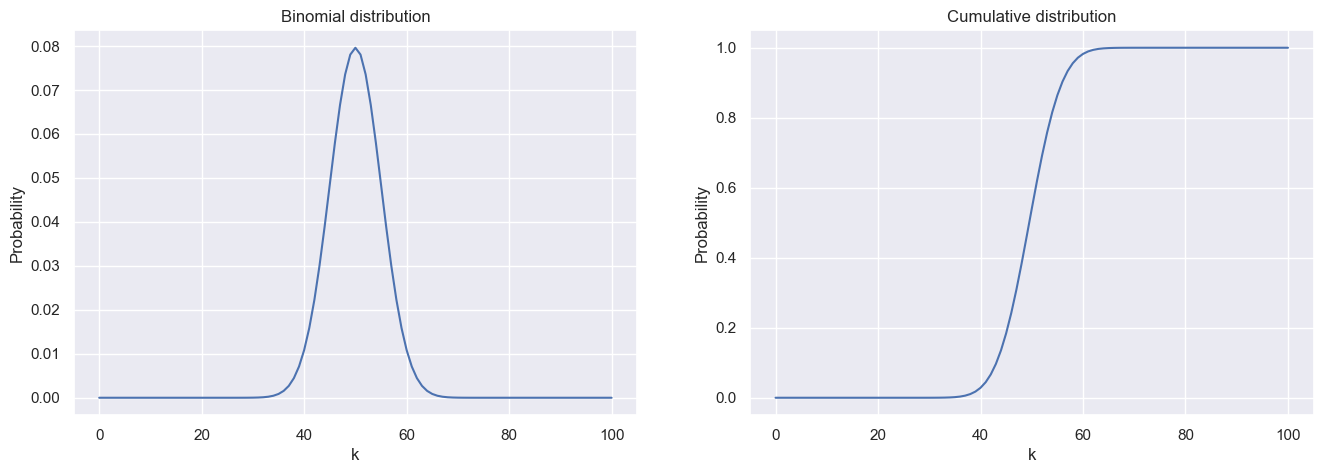

In [3]:
n = 100
k = np.arange(0, n + 1, 1)
p = 0.5

binomial = sp.stats.binom(n, p)
prob = binomial.pmf(k)

fix, axs = plt.subplots(1, 2, figsize=(16, 5))
axs[0].plot(k, prob)
axs[0].set_title('Binomial distribution')
axs[0].set_xlabel('k')
axs[0].set_ylabel('Probability')

axs[1].plot(k, np.cumsum(prob))
axs[1].set_title('Cumulative distribution')
axs[1].set_xlabel('k')
axs[1].set_ylabel('Probability')
plt.show()

### Quantiles

Quantiles are used to indicate how many values are above or below a certain limit.

1. $C(k_{0.25} \| n, p) = 0.25$ is the 25 percentile or first quartile. Here, all $k$'s below $k_{0.25}$ make up 25 % of our probability or otherwise said, they make up 25% of our probability.
2. $C(k_{0.5} \| n, p) = 0.5$ is the 50 percentile or median
3. $C(k_{0.75} \| n, p) = 0.75$ is the 75 percentile or third quartile

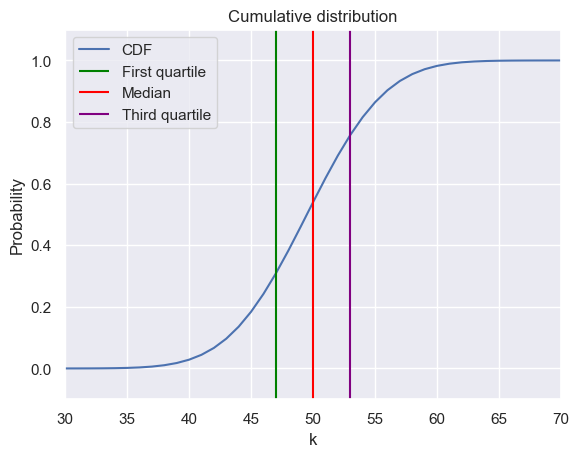

In [4]:
n = 100
k = np.arange(0, n + 1, 1)

binomial = sp.stats.binom(n, p)
prob = binomial.pmf(k)
c = np.cumsum(prob)

plt.plot(k, c ,label='CDF')
plt.title('Cumulative distribution')
plt.xlabel('k')
plt.ylabel('Probability')

plt.vlines(x=np.argmax(c > 0.25), ymin=-2, ymax=2, color='green', label='First quartile')
plt.vlines(x=np.argmax(c > 0.5), ymin=-2, ymax=2, color='red', label='Median')
plt.vlines(x=np.argmax(c > 0.75), ymin=-2, ymax=2, color='purple', label='Third quartile')

plt.ylim([-0.1, 1.1])
plt.xlim([30, 70])
plt.legend()
plt.show()

### Variance and standard-deviation

The variance is defined as the expected square deviation from the mean 

$$
var(k) = \langle (k - \langle k \rangle)^2 \rangle = \langle k^2 \rangle - \langle k \rangle ^2 = \sum_k (k - \langle k \rangle )^2 \mathbb{P}(k)
$$

The standard deviation is then just the square root of the varianve: $std(k) = \sqrt{var(k)}$

The variance of the binomial distribution is given as 

$$
var(k) = np(1 - p)
$$

<details>
<summary> Proof </summary>

$$
\begin{align*}
\frac{d^2}{dq^2} \sum_k \begin{pmatrix} n \\ k \end{pmatrix} q^k (1 - p)^{n - k} \Bigr|_{q = p} 
&= \sum_k \begin{pmatrix} n \\ k \end{pmatrix} k (k - 1) q^{k-2} (1 - p)^{n - k} \Bigr|_{q = p}  \\
&= \frac{1}{p^2} \sum_k \begin{pmatrix} n \\ k \end{pmatrix} k (k - 1) p^k (1 - p)^{n - k}  \\
&= \frac{\langle k(k - 1)\rangle}{p^2}  \\

\frac{d^2}{dq^2} \sum_k \begin{pmatrix} n \\ k \end{pmatrix} q^k (1 - p)^{n - k} \Bigr|_{q = p} 
&= \frac{d^2}{dq^2} (1 - p + q)^n \Bigr|_{q = p} \\
&= n(n - 1)(1 - p + q)^{n - 2} \Bigr|_{q = p} \\
&= n(n-1) \\

\Rightarrow n(n - 1) &= \frac{\langle k(k - 1)\rangle}{p^2} = \frac{\langle k^2 - k)\rangle}{p^2} = \frac{\langle k^2 \rangle - \langle k \rangle}{p^2} \\
\Leftrightarrow p^2 n^2 - n p^2 = \langle k \rangle ^2 - \langle k \rangle p &= \langle k^2 \rangle - \langle k \rangle \\
\Leftrightarrow \langle k^2 \rangle - \langle k \rangle^2 = var(k) &= \langle k \rangle  - \langle k \rangle p = np - np^2 = np(1 - p) \quad q.e.d
\end{align*}
$$


</details>

### Inverse problem

Looking at the inverse problem, where we don't know the probability $p$ but we know our sample size $n$ and how many times we observe a certain event as $k$, how can we go from our probability $\mathbb{P}(k | p, n)$ to the probability $\mathbb{P}(p, | k, n)$. Which is to say, how can we go from our observation to the distribution of the underlying probability given our data.

### Prior

Within the prior we can encode our information we already know of our distribution, like it's size. We denote $\mathcal{H}_n$ as our prior hypothisis, where $n$ is the size of our problem. These hypothisis are exhaustive and mutually exclusive (M.E.E). Incase of no real prior information, we just use an uniform prior.

### Likelihood

With the likelihood, we calculate the probability of observing our data. Let $\mathcal{D}$ be our data, then we can write our likelihood as:

$$
\mathbb{P}(\mathcal{D} | I) \overset{M.E.E}{=} \mathbb{P}(\mathcal{D} \sum_n \mathcal{H}_n | I) = \mathbb{P}(\sum_n \mathcal{D} \mathcal{H}_n | I) 
\overset{M.E.E}{=} \sum_n \mathbb{P}(\mathcal{D} \mathcal{H}_n | I) \overset{\text{Product rule}}{=} \sum_n \mathbb{P}(\mathcal{D} | \mathcal{H}_n I) \mathbb{P}(\mathcal{H}_n | I)
$$

Here $\mathbb{P}(\mathcal{H}_n | I)$ denotes the probability of our hypothisis for size $n$ being true and $\mathbb{P}(\mathcal{D} | \mathcal{H}_n I)$ denotes the probability of observing our data given the hypothisis of size $n$ and our information $I$. The summation over all $n$ gives then the total probability of our data.


### Bayes Theorem

With the given prior and likelihood we can calculate our wanted calculation by the use of the product rules. The bayes theorem is given by:

$$
\mathbb{P}(\mathcal{H}_n | \mathcal{D} I) = \frac{\mathbb{P}(\mathcal{D}| \mathcal{H}_n I)\mathbb{P}(\mathcal{H}_n | I)}{\mathbb{P}(\mathcal{D}| I)} = \frac{\mathbb{P}(\mathcal{D}| \mathcal{H}_n I)\mathbb{P}(\mathcal{H}_n | I)}{\sum_i \mathbb{P}(\mathcal{D} | \mathcal{H}_i I) \mathbb{P}(\mathcal{H}_i | I)}
$$

<details>
<summary> Proof </summary>

By the product rule we can write:

$$
\mathbb{P}(AB | I) = \mathbb{P}(A | BI)\mathbb{P}(B | I) = \mathbb{P}(B | AI)\mathbb{P}(A | I) \Leftrightarrow \mathbb{P}(A | BI) = \frac{\mathbb{P}(B | AI)\mathbb{P}(A | I)}{\mathbb{P}(B | I)} \quad q.e.d
$$

</details>

The probability $\mathbb{P}(\mathcal{H}_n | \mathcal{D} I)$ is the so called posterior. The bayes formula can be thought of as the updating of our prior belief after observing the data, the posterior gives then the probability of how likely the data is given the specific hypothisis over how likely it is in general to get this data. 